Inspired by https://f1metrics.wordpress.com/2014/10/03/building-a-race-simulator/



In [1]:
import fastf1 as ff1
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from race import *
from constants import *

# Enable the cache by providing the name of the cache folder
ff1.Cache.enable_cache('cache')

In [2]:
year, grand_prix, session = 2022, 'Hungary', 'R'
race_weekend = ff1.get_session(year, grand_prix, session)
race_weekend.load()
print(race_weekend.event)

core           INFO 	Loading data for Hungarian Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


RoundNumber                                            13
Country                                           Hungary
Location                                         Budapest
OfficialEventName    FORMULA 1 ARAMCO MAGYAR NAGYDÍJ 2022
EventDate                             2022-07-31 17:00:00
EventName                            Hungarian Grand Prix
EventFormat                                  conventional
Session1                                       Practice 1
Session1Date                          2022-07-29 14:00:00
Session2                                       Practice 2
Session2Date                          2022-07-29 17:00:00
Session3                                       Practice 3
Session3Date                          2022-07-30 13:00:00
Session4                                       Qualifying
Session4Date                          2022-07-30 16:00:00
Session5                                             Race
Session5Date                          2022-07-31 15:00:00
F1ApiSupport  

In [3]:
race_weekend.laps.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:42.565000,1,NaT,1,1,0 days 00:26:07.764000,NaT,NaT,0 days 00:00:32.843000,0 days 00:00:26.532000,...,False,SOFT,2.0,False,0 days 01:02:05.807000,Red Bull Racing,VER,26,False,2022-07-31 13:03:06.185
1,0 days 01:05:37.025000,1,0 days 00:01:54.460000,2,1,NaT,NaT,0 days 00:00:48.472000,0 days 00:00:33.956000,0 days 00:00:32.032000,...,False,SOFT,3.0,False,0 days 01:03:42.565000,Red Bull Racing,VER,6,False,2022-07-31 13:04:42.943
2,0 days 01:07:05.216000,1,0 days 00:01:28.191000,3,1,NaT,NaT,0 days 00:00:33.699000,0 days 00:00:30.743000,0 days 00:00:23.749000,...,False,SOFT,4.0,False,0 days 01:05:37.025000,Red Bull Racing,VER,67,False,2022-07-31 13:06:37.403
3,0 days 01:08:30.274000,1,0 days 00:01:25.058000,4,1,NaT,NaT,0 days 00:00:30.148000,0 days 00:00:31.114000,0 days 00:00:23.796000,...,False,SOFT,5.0,False,0 days 01:07:05.216000,Red Bull Racing,VER,1,True,2022-07-31 13:08:05.594
4,0 days 01:09:54.395000,1,0 days 00:01:24.121000,5,1,NaT,NaT,0 days 00:00:29.811000,0 days 00:00:30.698000,0 days 00:00:23.612000,...,False,SOFT,6.0,False,0 days 01:08:30.274000,Red Bull Racing,VER,1,True,2022-07-31 13:09:30.652


In [4]:
race_laps = race_weekend.laps

In [5]:
laps = get_laps_by_driver(race_laps, 'VER')
laps.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:42.565000,1,NaT,1,1,0 days 00:26:07.764000,NaT,NaT,0 days 00:00:32.843000,0 days 00:00:26.532000,...,False,SOFT,2.0,False,0 days 01:02:05.807000,Red Bull Racing,VER,26,False,2022-07-31 13:03:06.185
1,0 days 01:05:37.025000,1,0 days 00:01:54.460000,2,1,NaT,NaT,0 days 00:00:48.472000,0 days 00:00:33.956000,0 days 00:00:32.032000,...,False,SOFT,3.0,False,0 days 01:03:42.565000,Red Bull Racing,VER,6,False,2022-07-31 13:04:42.943
2,0 days 01:07:05.216000,1,0 days 00:01:28.191000,3,1,NaT,NaT,0 days 00:00:33.699000,0 days 00:00:30.743000,0 days 00:00:23.749000,...,False,SOFT,4.0,False,0 days 01:05:37.025000,Red Bull Racing,VER,67,False,2022-07-31 13:06:37.403
3,0 days 01:08:30.274000,1,0 days 00:01:25.058000,4,1,NaT,NaT,0 days 00:00:30.148000,0 days 00:00:31.114000,0 days 00:00:23.796000,...,False,SOFT,5.0,False,0 days 01:07:05.216000,Red Bull Racing,VER,1,True,2022-07-31 13:08:05.594
4,0 days 01:09:54.395000,1,0 days 00:01:24.121000,5,1,NaT,NaT,0 days 00:00:29.811000,0 days 00:00:30.698000,0 days 00:00:23.612000,...,False,SOFT,6.0,False,0 days 01:08:30.274000,Red Bull Racing,VER,1,True,2022-07-31 13:09:30.652


In [6]:
calculate_race_lap_times(laps)
laps.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:42.565000,1,0 days 00:01:36.758000,1,1,0 days 00:26:07.764000,NaT,NaT,0 days 00:00:32.843000,0 days 00:00:26.532000,...,False,SOFT,2.0,False,0 days 01:02:05.807000,Red Bull Racing,VER,26,False,2022-07-31 13:03:06.185
1,0 days 01:05:37.025000,1,0 days 00:01:54.460000,2,1,NaT,NaT,0 days 00:00:48.472000,0 days 00:00:33.956000,0 days 00:00:32.032000,...,False,SOFT,3.0,False,0 days 01:03:42.565000,Red Bull Racing,VER,6,False,2022-07-31 13:04:42.943
2,0 days 01:07:05.216000,1,0 days 00:01:28.191000,3,1,NaT,NaT,0 days 00:00:33.699000,0 days 00:00:30.743000,0 days 00:00:23.749000,...,False,SOFT,4.0,False,0 days 01:05:37.025000,Red Bull Racing,VER,67,False,2022-07-31 13:06:37.403
3,0 days 01:08:30.274000,1,0 days 00:01:25.058000,4,1,NaT,NaT,0 days 00:00:30.148000,0 days 00:00:31.114000,0 days 00:00:23.796000,...,False,SOFT,5.0,False,0 days 01:07:05.216000,Red Bull Racing,VER,1,True,2022-07-31 13:08:05.594
4,0 days 01:09:54.395000,1,0 days 00:01:24.121000,5,1,NaT,NaT,0 days 00:00:29.811000,0 days 00:00:30.698000,0 days 00:00:23.612000,...,False,SOFT,6.0,False,0 days 01:08:30.274000,Red Bull Racing,VER,1,True,2022-07-31 13:09:30.652


In [7]:
convert_laptime_to_seconds(laps)
laps.head()

C:\Users\chun\PycharmProjects\formulaOneBeginner\race.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "LapTime"] = df["LapTime"].dt.total_seconds()


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:42.565000,1,96.758,1,1,0 days 00:26:07.764000,NaT,NaT,0 days 00:00:32.843000,0 days 00:00:26.532000,...,False,SOFT,2.0,False,0 days 01:02:05.807000,Red Bull Racing,VER,26,False,2022-07-31 13:03:06.185
1,0 days 01:05:37.025000,1,114.460,2,1,NaT,NaT,0 days 00:00:48.472000,0 days 00:00:33.956000,0 days 00:00:32.032000,...,False,SOFT,3.0,False,0 days 01:03:42.565000,Red Bull Racing,VER,6,False,2022-07-31 13:04:42.943
2,0 days 01:07:05.216000,1,88.191,3,1,NaT,NaT,0 days 00:00:33.699000,0 days 00:00:30.743000,0 days 00:00:23.749000,...,False,SOFT,4.0,False,0 days 01:05:37.025000,Red Bull Racing,VER,67,False,2022-07-31 13:06:37.403
3,0 days 01:08:30.274000,1,85.058,4,1,NaT,NaT,0 days 00:00:30.148000,0 days 00:00:31.114000,0 days 00:00:23.796000,...,False,SOFT,5.0,False,0 days 01:07:05.216000,Red Bull Racing,VER,1,True,2022-07-31 13:08:05.594
4,0 days 01:09:54.395000,1,84.121,5,1,NaT,NaT,0 days 00:00:29.811000,0 days 00:00:30.698000,0 days 00:00:23.612000,...,False,SOFT,6.0,False,0 days 01:08:30.274000,Red Bull Racing,VER,1,True,2022-07-31 13:09:30.652


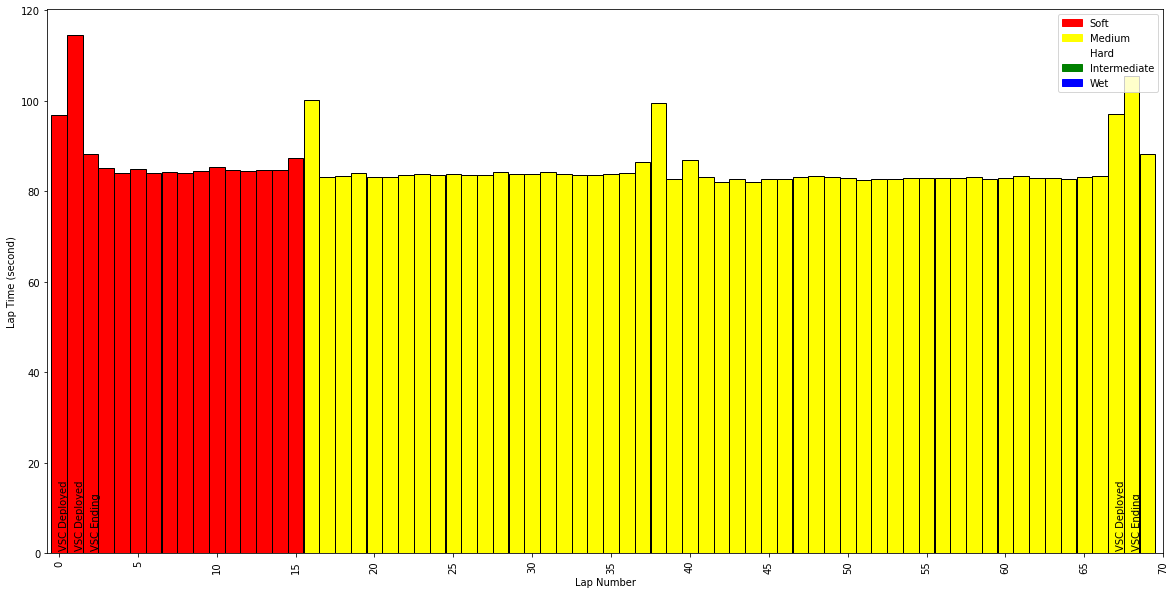

In [9]:
# Plot the graph
laptime_bar_graph = plot_lap_time_bar_graph(laps)


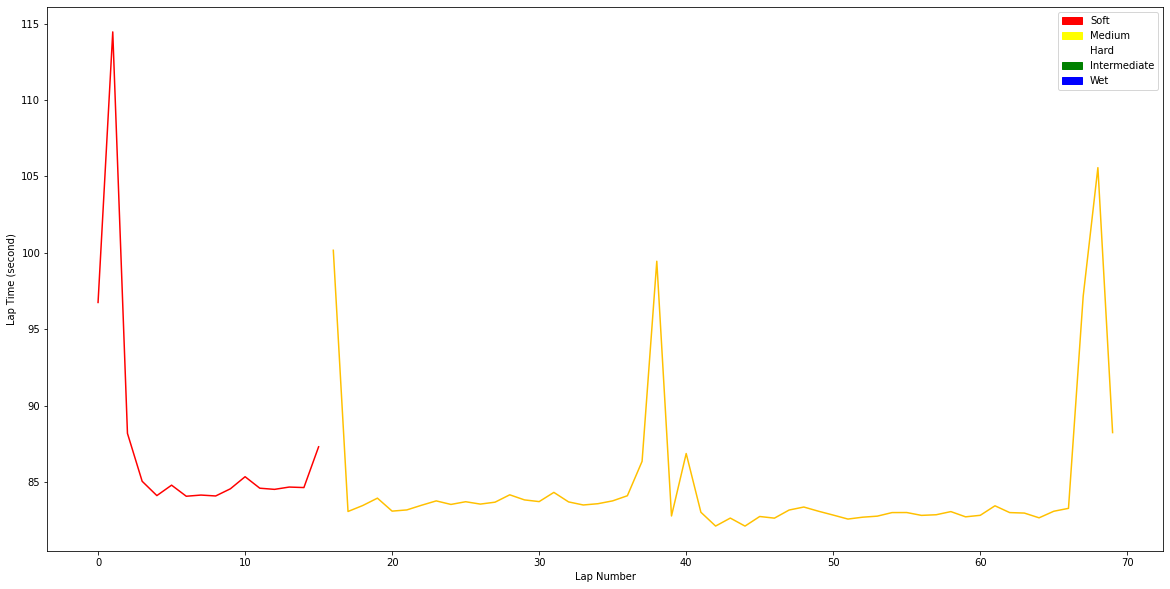

In [10]:
# Use the unstack function to separate the LapTime based on Compounds so we can plot by color later (by ignoring the NA values)
laptime_line_graph = plot_lap_time_line_graph(laps)